In [9]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from vae import vae

%matplotlib inline

In [14]:
batch_size = 64
lr = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:

transform = transforms.Compose([
    transforms.ToTensor(),
])

val_data = datasets.MNIST(
    root='../input/data',
    train=False,
    download=True,
    transform=transform
)

val_loader = DataLoader(
    val_data,
    batch_size=batch_size,
    shuffle=False
)

In [30]:
model = vae(input_dim = 784)
checkpoint_filepath = "weights.pt"
checkpoint = torch.load(checkpoint_filepath)

model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [17]:
sample, _ = next(iter(val_loader))
reconstruction, _ , _ = model(sample)

def image_from_tensor(tensor, index):
    return tensor[index].detach().numpy().reshape(28, -1)

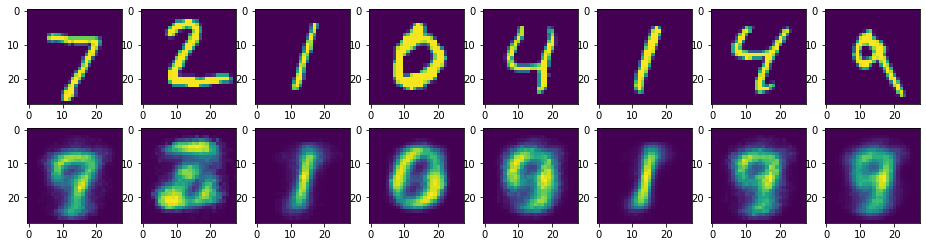

In [31]:
num_samples = 8
fig = plt.figure(figsize = (2 * num_samples,4))

for sample_index in range(num_samples):
    image = image_from_tensor(sample, sample_index)
    reconstructed_image = image_from_tensor(reconstruction, sample_index)
    fig.add_subplot(2,num_samples,sample_index + 1)
    plt.imshow(image)
    fig.add_subplot(2,num_samples,num_samples+sample_index + 1)
    plt.imshow(reconstructed_image)

plt.show()